In [1]:
import healpy as hp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from astropy.io import fits

In [3]:
smica_map = hp.read_map("Data/RAW/COM_CMB_IQU-smica-field-Int_2048_R2.01_full.fits")
#commander_map = hp.read_map("Data/RAW/COM_CMB_IQU-commander-field-Int_2048_R2.01_full(1).fits")
#nilc_map = hp.read_map("Data/RAW/COM_CMB_IQU-nilc-field-Int_2048_R2.01_full.fits")
#sevem_map = hp.read_map("Data/RAW/COM_CMB_IQU-sevem-field-Int_2048_R2.01_full.fits")

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


In [4]:
plotly.tools.set_credentials_file(username='m.dezylva', api_key='hjuAn0MpCX5Jwmu4jP0Q')
plotly.tools.set_credentials_file(username='m.dezylva', api_key='hjuAn0MpCX5Jwmu4jP0Q')


In [5]:
smica_half_1 = hp.read_map('Data/RAW/COM_CMB_IQU-smica-field-Int_2048_R2.01_halfmission-1.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


In [6]:
smica_half_2 = hp.read_map('Data/RAW/COM_CMB_IQU-smica-field-Int_2048_R2.01_halfmission-2.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


In [7]:
# Project Function Header File
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
plotly.tools.set_credentials_file(username='m.dezylva', api_key='hjuAn0MpCX5Jwmu4jP0Q')


def extract_map(file_name,percent_mask):
    if percent_mask == "20":
        return(hp.read_map(file_name,0).astype(np.bool))
    if percent_mask == "40":
        return(hp.read_map(file_name,1).astype(np.bool))
    if percent_mask == "60":
        return(hp.read_map(file_name,2).astype(np.bool))
    if percent_mask == "70":
        return(hp.read_map(file_name,3).astype(np.bool))
    if percent_mask == "80":
        return(hp.read_map(file_name,4).astype(np.bool))
    if percent_mask == "90":
        return(hp.read_map(file_name,5).astype(np.bool))
    if percent_mask == "97":
        return(hp.read_map(file_name,6).astype(np.bool))
    if percent_mask == "99":
        return(hp.read_map(file_name,7).astype(np.bool))

def mask_map(mask_name,map):
    mask_selection = input("Enter Percentage to Mask (20,40,60,70,80,90,97,99):")
    path = input("Enter file Path:")
    mask = extract_map(path+mask_name,mask_selection)
    map_masked = hp.ma(map)
    map_masked.mask = np.logical_not(mask)
    return(map_masked)

def extract_pwr_spec(map_name):
    #Set Maximum Multipole
    LMAX = 2048
    #Extract Power Spectrum
    cl = hp.anafast(map_name, lmax=LMAX)

    #Initialise Array of X values
    ell = np.arange(len(cl))
    
        
    #Seek Input regarding output name
    fig_name = input("Input Figure Name:")
    
    readout = input("Enter read out method:")
    
    if readout == 'pyplot':
        #Plotting Multipole Moment
        plt.figure(figsize=(8.0, 5.0))
        plt.plot(ell, (ell * (ell+1) * cl)/(2*np.pi))
        plt.xscale('log')
        plt.xlabel('l')
        plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
        plt.grid()
        #Change Path appropriately
        plt.savefig("Output/Test/"+fig_name+".svg")
        plt.show()
   
    if readout == 'plotly':
        trace = go.Scatter(
        x = ell,
        y = (ell * (ell+1) * cl)/(2*np.pi)
        )
    
        data = [trace]
    
        # Edit the layout
        layout = go.Layout(title = 'Smica Power Spectrum',
                  xaxis = dict(title = 'l',type='log',autorange=True),
                  yaxis = dict(title = r'$\frac{l(l+1)C_l}{2\pi}$'),                 
        )
        fig = go.Figure(data=data, layout=layout)

        py.iplot(fig)
        
        py.image.save_as(fig, filename='Output/Test/'+fig_name+'.png')
        from IPython.display import Image
        Image('Output/Test/'+fig_name+'.png')


    hp.write_cl("Output/Test/"+fig_name+".fits", cl)

def extract_crss_spec(map_name1,map_name2):
    #Set Maximum Multipole
    LMAX = 2048
    #Extract Power Spectrum
    cl = hp.anafast(map_name1,map_name2, lmax=LMAX)

    #Initialise Array of X values
    ell = np.arange(len(cl))
    
        
    #Seek Input regarding output name
    fig_name = input("Input Figure Name:")
    
    readout = input("Enter read out method:")
    
    if readout == 'pyplot':
        #Plotting Multipole Moment
        plt.figure(figsize=(8.0, 5.0))
        plt.plot(ell, (ell * (ell+1) * cl)/(2*np.pi))
        plt.xscale('log')
        plt.xlabel('l')
        plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
        plt.grid()
        #Change Path appropriately
        plt.savefig("Output/Test/"+fig_name+".svg")
        plt.show()
   
    if readout == 'plotly':
        trace = go.Scatter(
        x = ell,
        y = (ell * (ell+1) * cl)/(2*np.pi)
        )
    
        data = [trace]
    
        # Edit the layout
        layout = go.Layout(title = 'Smica Power Spectrum',
                  xaxis = dict(title = 'l',type='log',autorange=True),
                  yaxis = dict(title = r'$\frac{l(l+1)C_l}{2\pi}$'),                 
        )
        fig = go.Figure(data=data, layout=layout)

        py.iplot(fig)
        
        py.image.save_as(fig, filename='Output/Test/'+fig_name+'.png')
        from IPython.display import Image
        Image('Output/Test/'+fig_name+'.png')


    hp.write_cl("Output/Test/"+fig_name+".fits", cl)


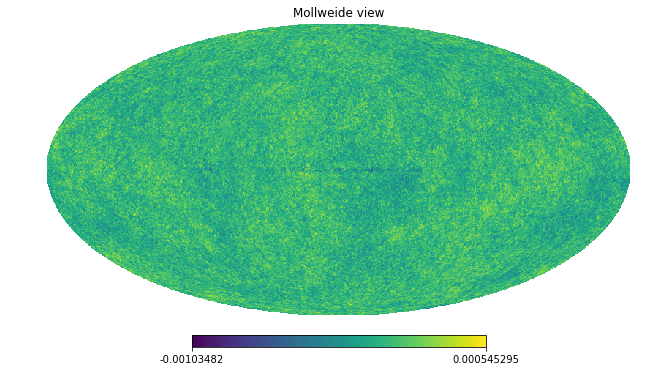

In [8]:
hp.mollview(smica_half_1)
plt.show()


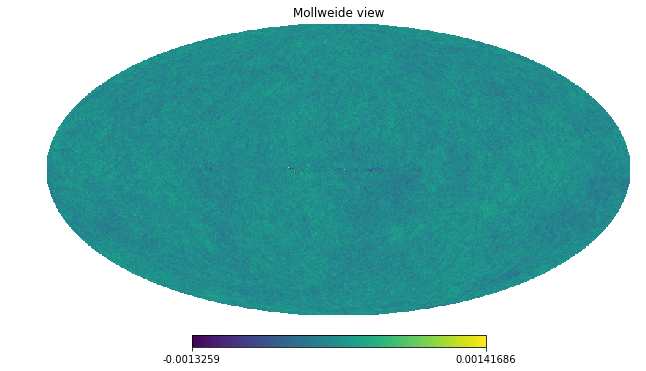

In [9]:
hp.mollview(smica_half_2)
plt.show()

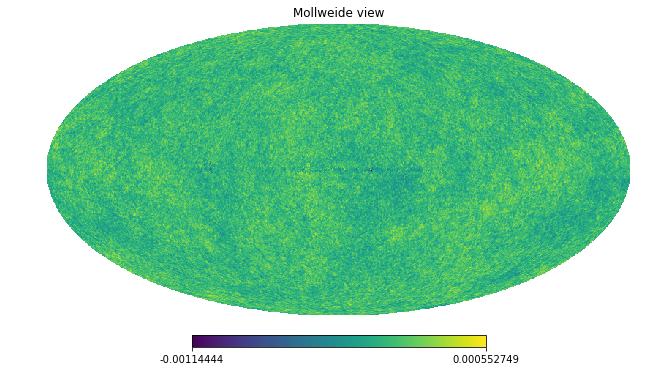

In [10]:
hp.mollview(smica_map)
plt.show()

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


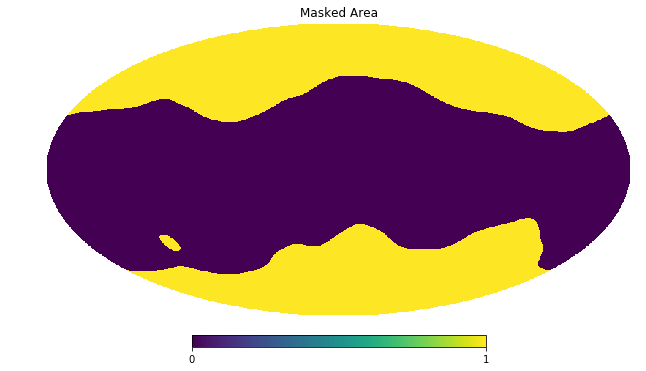

In [11]:
mask = hp.read_map("Data/Masks/HFI_Mask_GalPlane-apo2_2048_R2.00.fits",1).astype(np.bool)
hp.mollview(mask)
plt.title("Masked Area")
plt.show()

In [12]:
#extract_crss_spec(smica_half_1,smica_half_2)

In [13]:
smica_half_1_masked = mask_map('HFI_Mask_GalPlane-apo2_2048_R2.00.fits',smica_half_1)

Enter Percentage to Mask (20,40,60,70,80,90,97,99):40
Enter file Path:Data/Masks/
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


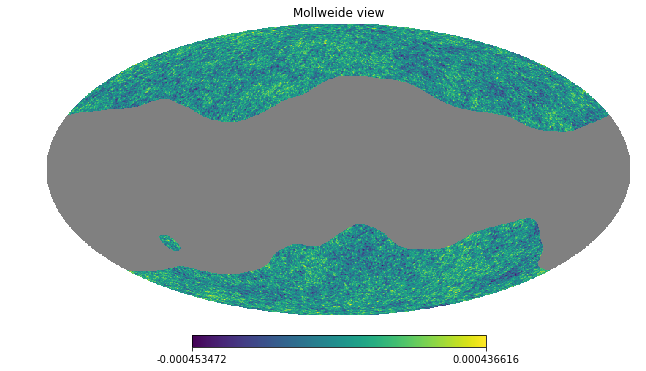

In [14]:
hp.mollview(smica_half_1_masked)
plt.show()

In [15]:
smica_half_2_masked = mask_map('HFI_Mask_GalPlane-apo2_2048_R2.00.fits',smica_half_2)

Enter Percentage to Mask (20,40,60,70,80,90,97,99):40
Enter file Path:Data/Masks/
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/mitchell/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:343: UserWarning:

No INDXSCHM keyword in header file : assume IMPLICIT



Ordering converted to RING


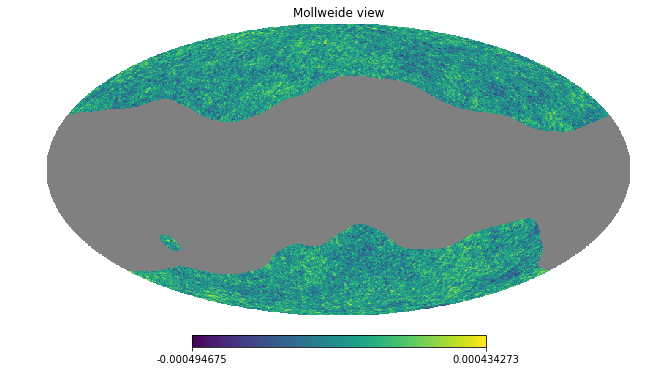

In [16]:
hp.mollview(smica_half_2_masked)
plt.show()

In [17]:
#extract_crss_spec(smica_half_1_masked,smica_half_2_masked)

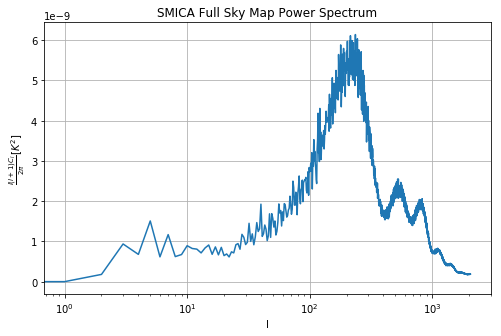

In [18]:
    LMAX = 2048
    #Extract Power Spectrum
    cl = hp.anafast(smica_map, lmax=LMAX)

    #Initialise Array of X values
    ell = np.arange(len(cl))
    
        
    #Seek Input regarding output name
        
        #Plotting Multipole Moment
    plt.figure(figsize=(8.0, 5.0))
    plt.plot(ell, (ell * (ell+1) * cl)/(2*np.pi))
    plt.xscale('log')
    plt.xlabel('l')
    plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi} [K^2]$ ')
    plt.title('SMICA Full Sky Map Power Spectrum')
    plt.grid()
        #Change Path appropriately
    plt.savefig("Output/Test/smica_full.jpg")
    plt.show()
   

In [21]:
#smica_mask = hp.read_map("Data/Masks/HFI_Mask_GalPlane-apo2_2048_R2.00.fits",1)

In [22]:
#mask_pwr_correct = hp.get_map_size(smica_half_1)-sum(hp.mask_bad(smica_mask.astype(bool),0))
#print(mask_pwr_correct)

In [23]:
#hp.get_map_size(smica_half_1)-sum(hp.mask_good(smica_mask.astype(bool),0))

In [24]:
cl = hp.anafast(smica_half_1_masked,smica_half_2_masked,lmax=3000)
cl = cl/0.4

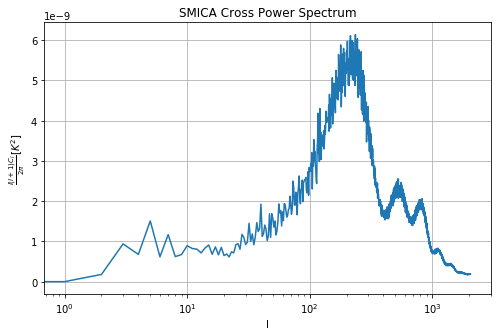

In [19]:
ell = np.arange(len(cl))
#Plotting Multipole Moment
plt.figure(figsize=(8.0, 5.0))
plt.plot(ell, (ell * (ell+1) * cl)/(2*np.pi))
plt.xscale('log')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi} [K^2]$')
plt.title('SMICA Cross Power Spectrum')
plt.grid()
plt.savefig("Output/Test/cross_spectrum_renorm.jpg")
plt.show()

In [26]:
noise = (smica_half_2_masked-smica_half_1_masked)

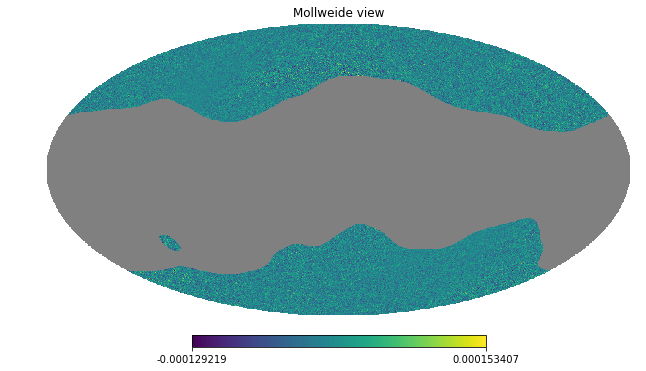

In [27]:
hp.mollview(noise)
plt.show()

In [28]:
theta_b = np.radians(5/(60*np.sqrt(8*np.log(2))))
print(theta_b)


0.000617644242666


In [29]:
b_l_sqrd = np.negative((theta_b)*(theta_b) * ell*(ell+1))
print(b_l_sqrd)
print(np.min(b_l_sqrd))
b_l_sqrd = np.exp(b_l_sqrd)
print(len(b_l_sqrd))
#print(np.min(b_l_sqrd))

[ -0.00000000e+00  -7.62968821e-07  -2.28890646e-06 ...,  -3.42992710e+00
  -3.43221524e+00  -3.43450415e+00]
-3.43450414772
3001


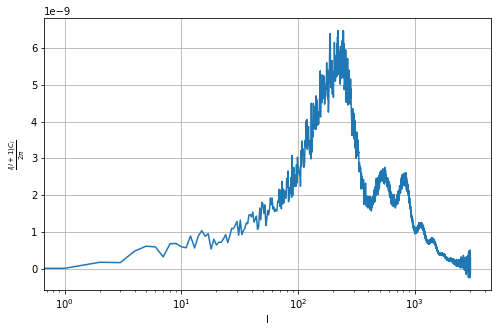

In [30]:
cl = hp.anafast(smica_half_1_masked,smica_half_2_masked,lmax=3000,)
cl = cl/0.4
ell = np.arange(len(cl))
cl = (ell*(ell+1)*cl/(2*np.pi))
cl = cl/b_l_sqrd
plt.figure(figsize=(8.0, 5.0))
plt.plot(ell, cl)
plt.xscale('log')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
plt.show()
#temp = np.array_split(cl,67)


In [31]:
bin_width = 20
number_of_bins = int(3000/bin_width)
print(number_of_bins)

150


In [32]:
temp_cls = np.array_split(cl,number_of_bins)
#print(temp_cls)
temp_ells = np.array_split(ell,number_of_bins)
#print(temp_ells)

In [33]:
cb_new = np.zeros_like(cl)

In [34]:
for i in range(0,len(temp_cls)):
    cb_new[(((i)*len(temp_cls[i]))+int(bin_width/2))] = np.mean(temp_cls[i])
lst_indexes= np.nonzero(cb_new)

cl_binned = np.zeros(len(lst_indexes[0]))
ell_binned = np.zeros(len(lst_indexes[0]))

for i in range(len(lst_indexes[0])):
 #   print(i)
    cl_binned[i] = cb_new[lst_indexes[0][i]]
    ell_binned[i] = lst_indexes[0][i]
#print(cl_binned)
#print(ell_binned)

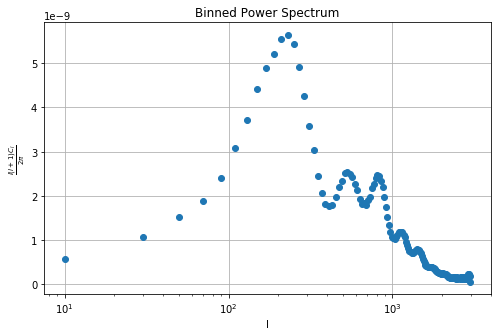

In [35]:
plt.figure(figsize=(8.0, 5.0))
plt.plot(ell_binned, cl_binned,'o')
plt.xscale('log')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.title('Binned Power Spectrum')
plt.grid()
plt.show()

In [34]:
#from scipy.interpolate import interp1d
#print(cb_new)
#print(len(cb_new))

In [35]:
#ell_binned_0 = np.insert(ell_binned,0,0)
#ell_binned_0 = np.append(ell_binned_0,[2048])
#print(len(ell_binned_0))
#print(ell_binned_0)

In [36]:
#cl_binned_0 = np.insert(cl_binned,0,0)
#cl_binned_0 = np.append(cl_binned_0,cl[2048])
#print(len(cl_binned_0))
#print(cl_binned_0)

In [37]:
#cl_interpolated = interp1d(ell_binned_0,cl_binned_0)
#ell_binned_int = np.arange(len(cl))
#cl_binned_int = cl_interpolated(ell_binned_int)

In [38]:
#plt.figure(figsize=(8.0, 5.0))
#plt.plot(ell_binned, cl_binned,'o',ell_binned_int,cl_binned_int,'-')
#plt.xscale('log')
#plt.xlabel('l')
#plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
#plt.grid()
#plt.savefig("Output/Test/pwr_spec_binned_interpolated.svg")
#plt.show()

In [39]:
def bin_pwr_spec(cls,num_of_bins):
    temp_cls = np.array_split(cl,number_of_bins)
    temp_ells = np.array_split(ell,number_of_bins)
    cb_new = np.zeros_like(cls)

    for i in range(0,len(temp_cls)):
        cb_new[(i+1)*len(temp_cls[i])] = np.mean(temp_cls[i])
    lst_indexes= np.nonzero(cb_new)

    cl_binned = np.zeros(len(lst_indexes[0]))
    ell_binned = np.zeros(len(lst_indexes[0]))

    for i in range(len(lst_indexes[0])):
        cl_binned[i] = cb_new[lst_indexes[0][i]]
        ell_binned[i] = lst_indexes[0][i]


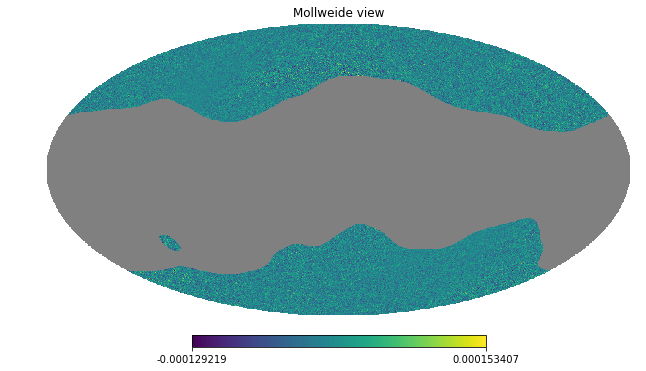

[  2.25137152e-14   2.74331448e-14   6.31456914e-14 ...,   2.25490670e-16
   2.23268273e-16   2.22972828e-16]
[  5.62842880e-14   6.85828620e-14   1.57864229e-13 ...,   5.63726674e-16
   5.58170682e-16   5.57432070e-16]
[  0.00000000e+00   2.18306030e-14   1.50749234e-13 ...,   8.06671681e-10
   7.99254101e-10   7.98728779e-10]


In [51]:
hp.mollview(noise)
plt.show()
cl_noise = hp.anafast(noise,lmax=3000,)
ell_noise = np.arange(len(cl_noise))
print(cl_noise)
cl_noise = cl_noise/0.4
print(cl_noise)
cl_noise = (ell_noise*(ell_noise+1)*cl_noise/(2*np.pi)) 
print(cl_noise)

In [52]:
cl_noise = cl_noise/b_l_sqrd
print((cl_noise))

[  0.00000000e+00   2.18306196e-14   1.50749579e-13 ...,   2.49054976e-08
   2.47330123e-08   2.47733953e-08]


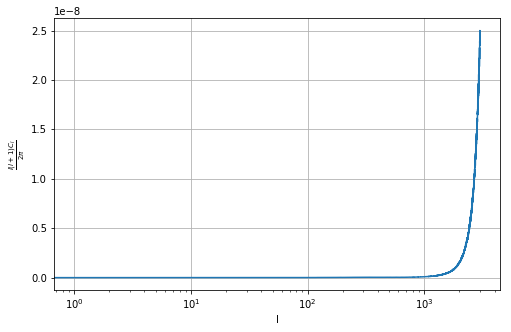

In [53]:
plt.figure(figsize=(8.0, 5.0))
plt.plot(ell_noise,cl_noise)
plt.xscale('log')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
plt.show()

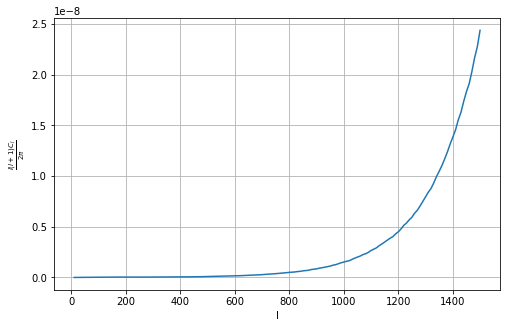

In [54]:
temp_cls_noise = np.array_split(cl_noise,3000/bin_width)
#print(temp_cls)
temp_ells_noise = np.array_split(ell_noise,3000/bin_width)
#print(temp_ells)
cb_new_noise = np.zeros_like(cl_noise)
for i in range(0,len(temp_cls)):
    cb_new_noise[(i+1)*int(len(temp_cls_noise[i])/2)] = np.mean(temp_cls_noise[i])
lst_indexes= np.nonzero(cb_new_noise)

cl_binned_noise = np.zeros(len(lst_indexes[0]))
ell_binned_noise = np.zeros(len(lst_indexes[0]))

for i in range(len(lst_indexes[0])):
 #   print(i)
    cl_binned_noise[i] = cb_new_noise[lst_indexes[0][i]]
    ell_binned_noise[i] = lst_indexes[0][i]
#print(cl_binned)
#print(ell_binned)

plt.figure(figsize=(8.0, 5.0))
plt.plot(ell_binned_noise, cl_binned_noise)
plt.xscale('linear')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
plt.show()

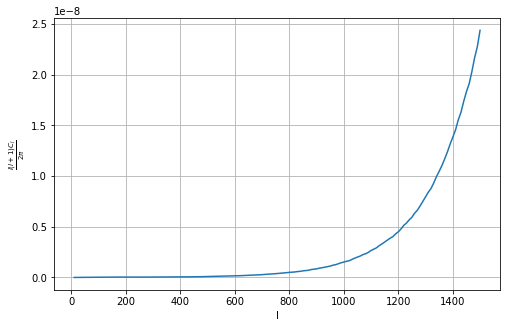

In [55]:
plt.figure(figsize=(8.0, 5.0))
plt.plot(ell_binned_noise, cl_binned_noise)
plt.xscale('linear')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
plt.show()

In [56]:
print(len(cl_binned))
print(len(cl_binned_noise))

150
150


In [57]:

delta_cb = np.sqrt((2)/((2*ell_binned+1)*bin_width*0.4)) * (cl_binned+cl_binned_noise) 
print(delta_cb/cl_binned)
print(np.argmax(delta_cb))

[ 0.10919217  0.06412689  0.04986992  0.04225092  0.03730361  0.03376642
  0.03106826  0.02893031  0.02717869  0.02572433  0.02447719  0.02340313
  0.02246871  0.02164479  0.02091299  0.0202682   0.01968325  0.01915907
  0.01869144  0.01824452  0.01782698  0.01738729  0.01695728  0.01656785
  0.01621403  0.01587511  0.01556393  0.01528815  0.01503939  0.01478729
  0.01455462  0.01435337  0.01416213  0.01394661  0.01375552  0.01355607
  0.01337747  0.01317883  0.01301589  0.01284458  0.01268719  0.01254721
  0.01242919  0.01231668  0.01222714  0.01217973  0.01215037  0.01214043
  0.01216702  0.01217545  0.01213799  0.01207029  0.01196549  0.0118867
  0.01178355  0.01174986  0.01169237  0.01167321  0.01172805  0.01174953
  0.01194617  0.01205188  0.01229447  0.0125512   0.01271854  0.01287618
  0.0129118   0.01286404  0.01283531  0.01285855  0.0129825   0.01321595
  0.01329221  0.01374419  0.01412004  0.01471396  0.01563401  0.01653042
  0.01773444  0.01889766  0.01997769  0.02056394  0.

In [58]:
np.argmax(delta_cb)


149

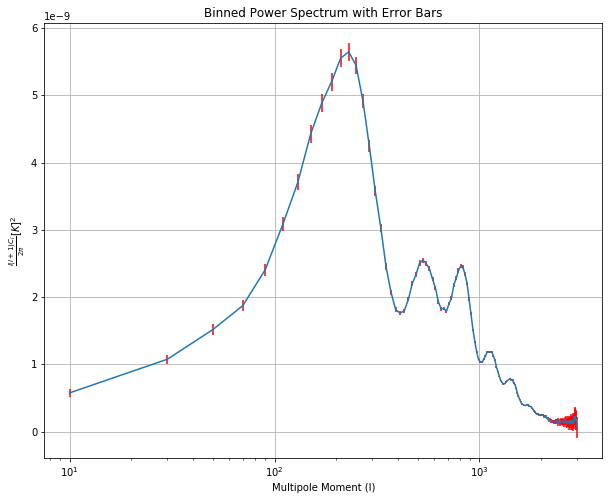

In [59]:
plt.figure(figsize=(10, 8))
#plt.plot(ell_binned, cl_binned,'o')#,ell_binned_int,cl_binned_int,'-')
plt.errorbar(ell_binned,cl_binned,yerr = delta_cb, ecolor='red')#,fmt = 'None')
plt.xscale('log')
plt.xlabel('Multipole Moment (l)')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi} [K]^2$')
plt.title('Binned Power Spectrum with Error Bars')
plt.grid()
#plt.savefig("Output/Test/pwr_spec_binned_bars.svg")
plt.show()


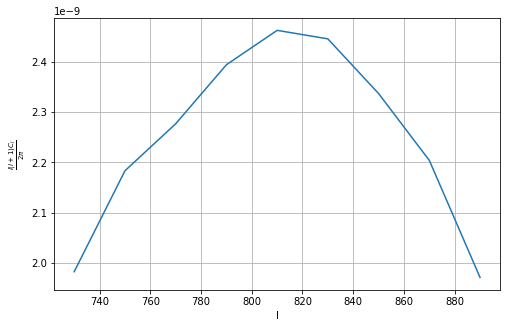

In [57]:
plt.figure(figsize=(8.0,5.0))
#plt.plot(ell_binned, cl_binned,'o')#,ell_binned_int,cl_binned_int,'-')
plt.plot(ell_binned[36:45],cl_binned[36:45])
plt.xscale('linear')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
#plt.savefig("Output/Test/pwr_spec_binned_bars.svg")
plt.show()

In [95]:
from lmfit import  Model
from numpy import linspace, loadtxt
from lmfit.models import GaussianModel, LinearModel

In [99]:
x = ell_binned[36:45]
y = cl_binned[36:45]

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 9
    # variables        = 3
    chi-square         = 5.081
    reduced chi-square = 0.847
    Akaike info crit   = 0.855
    Bayesian info crit = 1.447
[[Variables]]
    amp:   7.5228e-07 +/- 1.58e-08 (2.09%) (init= 7.52e-07)
    cen:   811.000101 +/- 1.135228 (0.14%) (init= 810)
    wid:   122.343690 +/- 3.059895 (2.50%) (init= 122)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.982 



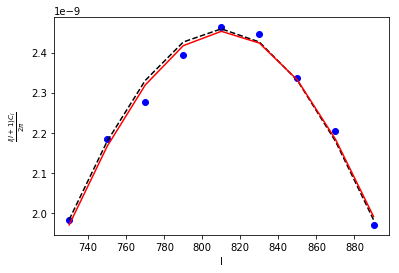

In [101]:
# Manually Defining the Gaussian seems to make recovering the X^2 value difficult. Not sure why, so instead
# utilised the Gaussian Class Bay

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, weights = 1.0/delta_cb[36:45], amp=7.52e-7, cen=810, wid=122)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.show()

In [ ]:
mod = GaussianModel() #+ LinearModel()
pars  = mod.make_params(amplitude=1.28e-6, center=230, sigma=90)#,slope=0, intercept=2.68e-9)
result = mod.fit(y, pars, method='leastsq', x=x, weights=1./delta_cb[36:45])
rsq = 1 - result.residual.var() / np.var(y)    

print(result.fit_report())
print(result.residual.var())

plt.plot(x, y,         'bo', label='raw')
plt.plot(x, result.init_fit, 'k--', label='Initial_Guess')
plt.plot(x, result.best_fit, 'r-', label='Best')
plt.legend()
plt.show()

In [76]:
import numpy as np
from scipy import optimize

class Parameter:
    def __init__(self, value):
            self.value = value

    def set(self, value):
            self.value = value

    def __call__(self):
            return self.value

def fit(function, parameters, y, x = None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return y - function(x)

    if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
plt.xscale('log')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.grid()
axarr[0].plot(ell_binned, cl_binned)
axarr[0].set_title('Angular Power Spectrum of SMICA Map')
axarr[1].plot(ell_binned, delta_cb)
f.subplots_adjust(hspace=0.2)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()


Chi-Square according to Stats=  Power_divergenceResult(statistic=1.3330800497626635e-11, pvalue=1.0)
Chi-Square according to Manual Calc=  7.04139609533e-24
Fitted mean =  218.306171709
Fitted standard deviation =  97.5638128822
Fitted amplitude 1.37066346118e-06


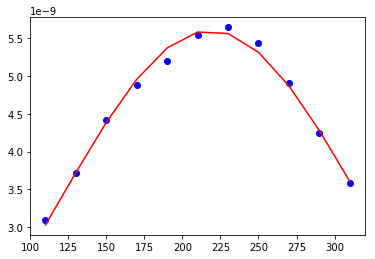

Chi-Square according to Stats=  Power_divergenceResult(statistic=1.3330799612382807e-11, pvalue=1.0)
Chi-Square according to Manual Calc=  7.04139597279e-24
Fitted mean =  218.306171125
Fitted standard deviation =  97.5638145026
Fitted amplitude 1.3706634759e-06
Ratio of Peaks =  0.999999989259


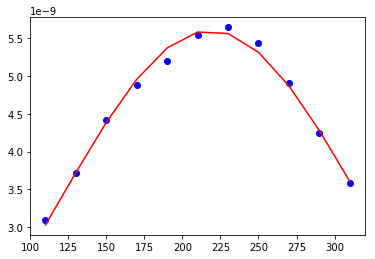

In [68]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import chisquare


x = ell_binned[5:16]
y = cl_binned[5:16]
# Define some test data which is close to Gaussian
#data = numpy.random.normal(size=10000)

#hist, bin_edges = numpy.histogram(data, density=True)
#bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A/(np.sqrt(2*np.pi)*sigma)*  numpy.exp(-(x-mu)**2/(2.*sigma**2))

#amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2)

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [2.5e-9, 520, 120]

coeff, var_matrix = curve_fit(gauss,x, y, p0=p0,sigma=delta_cb[5:16])

# Get the fitted curve
gauss_fit = gauss(ell_binned[5:16], *coeff)

plt.plot(ell_binned[5:16], cl_binned[5:16],'bo' ,label='Test data')
plt.plot(ell_binned[5:16], gauss_fit,'r-' ,label='Fitted data')

chisq1 = chisquare(y,gauss_fit)
print("Chi-Square according to Stats= ",chisq1)
chisq2 = sum( (y-gauss_fit)**2/(coeff[2]**2))
print("Chi-Square according to Manual Calc= ",chisq2)

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])
print('Fitted amplitude',coeff[0])

amp_p2 = coeff[0]

plt.show()


x = ell_binned[5:16]
y = cl_binned[5:16]
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [7.52e-7, 220, 90]


coeff, var_matrix = curve_fit(gauss,x, y, p0=p0,sigma=delta_cb[5:16])

# Get the fitted curve
gauss_fit = gauss(ell_binned[5:16], *coeff)

plt.plot(ell_binned[5:16], cl_binned[5:16],'bo' ,label='Test data')
plt.plot(ell_binned[5:16], gauss_fit,'r-' ,label='Fitted data')

chisq1 = chisquare(y,gauss_fit)
print("Chi-Square according to Stats= ",chisq1)
chisq2 = sum( (y-gauss_fit)**2/(coeff[2]**2))
print("Chi-Square according to Manual Calc= ",chisq2)

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])
print('Fitted amplitude',coeff[0])

amp_p3 = coeff[0]

print('Ratio of Peaks = ', amp_p2/amp_p3)
plt.show()

In [69]:
fitfunc = lambda p, x: p[0]/(np.sqrt(2*np.pi)*p[2]) *np.exp(- (x - p[1])**2/(2*p[2]**2))  # Target function
#amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2)


In [70]:
errfunc = lambda p, x, y,err: (fitfunc(p, x) - y)/err # Distance to the target function

In [71]:
print(p0)

[7.52e-07, 220, 90]


In [79]:
out = optimize.leastsq(errfunc, p0[:], args=(x, y,delta_cb[5:16]),full_output=1)

In [80]:
pfinal = out[0]
covar = out[1]

In [81]:
print(pfinal)
print(covar)

[  1.37066348e-06   2.18306171e+02   9.75638145e+01]
[[  4.05465256e-16  -2.26378000e-09   3.51489347e-08]
 [ -2.26378000e-09   1.36111229e+00  -2.49526963e-02]
 [  3.51489347e-08  -2.49526963e-02   4.12215847e+00]]


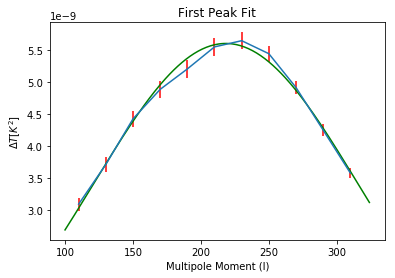

In [90]:
plt.errorbar(x,y,yerr = delta_cb[5:16], ecolor='red')
plt.plot(ell[100:325], fitfunc(pfinal, ell[100:325]), "g-") # Plot of the data and the fit
plt.xlabel('Multipole Moment (l)')
plt.ylabel(r'$\Delta T [K^2]$')
plt.title('First Peak Fit')
plt.show()

In [87]:
print('Fitted Gaussian of :')
print('Amplitude = ', pfinal[0])
print('Mean = ',pfinal[1])
real_fp_loc = pfinal[1]
print('St Dev = ',pfinal[2])
print('Chi Square =',sum((errfunc(pfinal,x,y,err = delta_cb[5:16]))**2))
#third_pk_amp = pfinal[0]
#second_pk_amp = pfinal[0]

Fitted Gaussian of :
Amplitude =  1.37066347573e-06
Mean =  218.306171128
St Dev =  97.5638144854
Chi Square = 4.31717780322


In [ ]:
#planck_cls = hp.mrdfits("Data/Planck_Pwr_Spec/COM_PowerSpect_CMB_R2.02.fits",3)

In [ ]:
#hdulist = fits.open('Data/Planck_Pwr_Spec/COM_PowerSpect_CMB_R2.01.fits')
#hdulist.info()
#cl_data = hdulist[1].data


In [20]:
import sys, platform, os
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'../Code/')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../Code/')))
import camb
from camb import model, initialpower

Using CAMB installed at /home/mitchell/Documents/University/Year 3/Code


In [21]:
pars = camb.CAMBparams()

In [22]:
pars.set_cosmology(H0=67.5, ombh2=0.01574, omch2=0.1162, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2400, lens_potential_accuracy=1);

In [23]:
#print(pars)

In [24]:
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [25]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
lensedCL=powers['lensed_scalar']
print(totCL.shape)

(2451, 4)


In [26]:
print(pars)

WantCls = 1
WantTransfer = 0
WantScalars = 1
WantTensors = 0
WantVectors = 0
DoLensing = 1
want_zstar = 0
want_zdrag = 0
PK_WantTransfer = 0
NonLinear = 2
Want_CMB = 1
max_l = 2550
max_l_tensor = 600
max_eta_k = 18000.0
max_eta_k_tensor = 1200.0
omegab = 0.03454595336076817
omegac = 0.25503429355281204
omegav = 0.7090037994150019
omegan = 0.0014159536714179381
H0 = 67.5
TCMB = 2.7255
YHe = 0.24195013790042155
num_nu_massless = 2.030666666666667
num_nu_massive = 1
nu_mass_eigenstates = 1
share_delta_neff = 0
nu_mass_degeneracies = [1.0153333333333332, 0.0, 0.0, 0.0, 0.0]
nu_mass_fractions = [1.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_numbers = [1, 0, 0, 0, 0]
scalar_initial_condition = 1
OutputNormalization = 1
AccuratePolarization = 1
AccurateBB = 0
AccurateReionization = 1
MassiveNuMethod = 3
InitPower:
  tensor_parameterization = 2
  nn = 1
  an = [0.965, 1.0, 1.0, 1.0, 1.0]
  n_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  n_runrun = [0.0, 0.0, 0.0, 0.0, 0.0]
  ant = [0.0, 0.0, 0.0, 0.0, 0.0]
  nt_run = 

In [ ]:
plt.plot(ell[:len(lensedCL[:,0])],lensedCL[:,0],color='r')
plt.xscale('linear')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.show()

In [ ]:
peak_max = np.argmax(lensedCL[:,0])
print(peak_max)
print(lensedCL[peak_max,0])

In [ ]:
y_sim = lensedCL[725: 890 ,0]
#print(y_sim)
x_sim = ell[725: 890]
#print(x_sim)
plt.plot(x_sim,y_sim,color='r')
plt.xscale('linear')
plt.xlabel('l')
plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
plt.show()


In [ ]:
out = optimize.leastsq(errfunc, p3[:], args=(x_sim, y_sim,1.0/y_sim),full_output=1)

In [ ]:
pfinal = out[0]
covar = out[1]

In [ ]:
print(pfinal)
print(covar)

In [ ]:
plt.plot(x_sim,y_sim,'ro')
plt.plot(ell[725:890], fitfunc(pfinal, ell[725:890]), "g-") # Plot of the data and the fit
plt.show()

In [ ]:
print('Fitted Gaussian of :')
print('Amplitude = ', pfinal[0])
print('Mean = ',pfinal[1])
print('St Dev = ',pfinal[2])
print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))

In [ ]:
    y_sim_p2 = lensedCL[450: 625 ,0]
    #print(y_sim_p2)
    x_sim_p2 = ell[450:625]
    #print(x_sim_p2)
    #plt.plot(x_sim,y_sim,color='r')
    #plt.xscale('linear')
    #plt.xlabel('l')
    #plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
    #plt.show()
    out_p2 = optimize.leastsq(errfunc, p2[:], args=(ell[450:625], lensedCL[450: 625 ,0],1.0/lensedCL[450: 625 ,0]),full_output=1)
    pfinal_p2 = out_p2[0]
    covar_p2 = out_p2[1]
    plt.plot(x_sim_p2,y_sim_p2,'ro')
    plt.plot(ell[450:625], fitfunc(pfinal_p2, ell[450:625]), "g-") # Plot of the data and the fit
    plt.show()
    #print('Fitted Gaussian of :')
    #print('Amplitude = ', pfinal[0])
    #print('Mean = ',pfinal[1])
    #print('St Dev0= ',pfinal[2])
    #print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))
    peak_2_amp = pfinal_p2[0]
    print("Amplitude of Peak 2 = ", peak_2_amp)
    
    
    

In [ ]:
    y_sim_p3 = lensedCL[725: 890 ,0]
    #print(y_sim)
    x_sim_p3 = ell[725:890]
    #print(x_sim)
    #plt.plot(x_sim,y_sim,color='r')
    #plt.xscale('linear')
    #plt.xlabel('l')
    #plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
    #plt.show()
    print(p3)
    out_p3 = optimize.leastsq(errfunc, p3[:], args=(x_sim_p3, y_sim_p3,1.0/y_sim_p3),full_output=1)
    pfinal_p3 = out_p3[0]
    covar_p3 = out_p3[1]
    plt.plot(x_sim_p3,y_sim_p3,'ro')
    plt.plot(ell[725:890], fitfunc(pfinal_p3, ell[725:890]), "g-") # Plot of the data and the fit
    plt.show()
    #print('Fitted Gaussian of :')
    #print('Amplitude = ', pfinal[0])
    #print('Mean = ',pfinal[1])
    #print('St Dev0= ',pfinal[2])
    #print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))
    peak_ratio[3,index] = pfinal_p3[0]
    
    print("Amplitude of Peak 3 = ", pfinal_p3[0])
    peak_ratio[4,index] = pfinal_p3[0]/peak_2_amp
    print("Ratio of Peaks 2 and 3= ", pfinal_p3[0]/pfinal_p2[0])

In [ ]:
range_omega_k = np.arange(-.2,0.21,0.005)
#print(range_omega_k)
peak_locs = np.ndarray(shape=(2,len(range_omega_k)), order = 'F')
peak_locs[0,:] = range_omega_k
peak_locs[0,40] = 0
print(peak_locs)

In [ ]:
range_omega_c = np.arange(0.1,0.1305,0.0005)
#print(range_omega_c)
range_omega_b = 0.132-range_omega_c
#print(range_omega_b)
peak_ratio = np.ndarray(shape=(5,len(range_omega_b)), order = 'F')
peak_ratio[0,:] = range_omega_b
peak_ratio[1,:] = range_omega_c
peak_ratio[2:5,:] = 0
print(peak_ratio)

In [ ]:
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
index = 0
for i in range_omega_b:
    print("Omega B = ", i," Omega C =",0.132-i)
    #pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=i, omch2=0.132-i, mnu=0.06, omk=0, tau=0.06)
    pars.InitPower.set_params(ns=0.965, r=0)
    pars.set_for_lmax(2400, lens_potential_accuracy=0);
    #calculate results for these parameters
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars)
    for name in powers: print(name)
    totCL=powers['total']
    lensedCL=powers['lensed_scalar']
    print(totCL.shape)
    peak_max = np.argmax(lensedCL[:,0])
    y_sim = lensedCL[max(peak_max -75,0): peak_max +75 ,0]
    #print(y_sim)
    x_sim = ell[max(peak_max -75,0): peak_max +75]
    #print(x_sim)
    #plt.plot(x_sim,y_sim,color='r')
    #plt.xscale('linear')
    #plt.xlabel('l')
    #plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
    #plt.show()
    out = optimize.leastsq(errfunc, p0[:], args=(x_sim, y_sim,1.0/y_sim),full_output=1)
    pfinal = out[0]
    covar = out[1]
    #plt.plot(x_sim,y_sim,'ro')
    #plt.plot(ell[100:325], fitfunc(pfinal, ell[100:325]), "g-") # Plot of the data and the fit
    #plt.show()
    #print('Fitted Gaussian of :')
    #print('Amplitude = ', pfinal[0])
    #print('Mean = ',pfinal[1])
    #print('St Dev = ',pfinal[2])
    #print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))
    peak_locs[0,index] = i
    peak_locs[1,index] = pfinal[1]
    index += 1

In [ ]:
print(peak_locs)

In [7]:
#np.savetxt("peak_locations.txt",peak_locs,delimiter=',')
from numpy import genfromtxt
peak_locs = genfromtxt('peak_locations.txt', delimiter=',')

Estimated value of Omega_K of the Universe =  -0.0020915077039821133
0.00282825800196


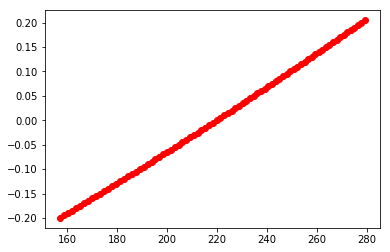

In [92]:
plt.plot(peak_locs[1,:],peak_locs[0,:],'ro')
from scipy.interpolate import interp1d
f = interp1d(peak_locs[1,:],peak_locs[0,:])
print('Estimated value of Omega_K of the Universe = ' , f(real_fp_loc + 0.857043)) #Error is 0.857043
print(f(real_fp_loc + 0.857043)- f(real_fp_loc))
plt.show()

In [102]:
p2 = [8.37e-7, 520, 120]
p3 = [7.52e-7,811,120]
print(p2,p3)

[8.37e-07, 520, 120] [7.52e-07, 811, 120]


In [ ]:
pars.WantTensors = True
results = camb.get_transfer_functions(pars)
index = 0
for i in range_omega_b:
    print("Omega B = ", i," Omega C =",0.132-i)
    #pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=i, omch2=0.132-i, mnu=0.06, omk=0, tau=0.06)
    pars.InitPower.set_params(ns=0.965, r=0)
    pars.set_for_lmax(2400, lens_potential_accuracy=0);
    #calculate results for these parameters
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars)
    #for name in powers: print(name)
    totCL=powers['total']
    lensedCL=powers['lensed_scalar']
    #print(totCL.shape)
    y_sim_p2 = lensedCL[450: 625 ,0]
    #print(y_sim)
    x_sim_p2 = ell[450:625]
    #print(x_sim)
    #plt.plot(x_sim,y_sim,color='r')
    #plt.xscale('linear')
    #plt.xlabel('l')
    #plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
    #plt.show()
    out_p2 = optimize.leastsq(errfunc, p2[:], args=(ell[450:625], lensedCL[450: 625 ,0],1.0/lensedCL[450: 625 ,0]),full_output=1)
    pfinal_p2 = out_p2[0]
    covar_p2 = out_p2[1]
    #plt.plot(x_sim,y_sim,'ro')
    #plt.plot(ell[100:325], fitfunc(pfinal, ell[100:325]), "g-") # Plot of the data and the fit
    #plt.show()
    #print('Fitted Gaussian of :')
    #print('Amplitude = ', pfinal[0])
    #print('Mean = ',pfinal[1])
    #print('St Dev0= ',pfinal[2])
    #print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))
    peak_ratio[0,index] = i
    peak_ratio[1,index] = 0.132-i
    print("Amplitude of Peak 2 = ", pfinal_p2[0])
    peak_ratio[2,index] = pfinal_p2[0]
    
    y_sim_p3 = lensedCL[725: 890 ,0]
    #print(y_sim)
    x_sim_p3 = ell[725:890]
    #print(x_sim)
    #plt.plot(x_sim,y_sim,color='r')
    #plt.xscale('linear')
    #plt.xlabel('l')
    #plt.ylabel(r'$\frac{l(l+1)C_l}{2\pi}$')
    #plt.show()
    out_p3 = optimize.leastsq(errfunc, p3[:], args=(ell[725:890], lensedCL[725: 890 ,0],1.0/lensedCL[725: 890 ,0]),full_output=1)
    pfinal_p3 = out_p3[0]
    covar_p3 = out_p3[1]
    #plt.plot(x_sim,y_sim,'ro')
    #plt.plot(ell[100:325], fitfunc(pfinal, ell[100:325]), "g-") # Plot of the data and the fit
    #plt.show()
    #print('Fitted Gaussian of :')
    #print('Amplitude = ', pfinal[0])
    #print('Mean = ',pfinal[1])
    #print('St Dev0= ',pfinal[2])
    #print('Chi Square =',sum((errfunc(pfinal,x_sim,y_sim,err = 1/y_sim))**2))
    peak_ratio[3,index] = pfinal_p3[0]
    
    print("Amplitude of Peak 3 = ", pfinal_p3[0])
    peak_ratio[4,index] = pfinal_p3[0]/pfinal_p2[0]
    print("Ratio of Peaks 2 and 3= ", pfinal_p3[0]/pfinal_p2[0])
    
    
    index += 1

In [ ]:
print(peak_ratio)

In [ ]:
#np.savetxt("peak_amps.txt",peak_ratio,delimiter=',')

In [10]:
#np.savetxt("peak_locations.txt",peak_locs,delimiter=',')
from numpy import genfromtxt
peak_amps = genfromtxt('peak_amps.txt', delimiter=',')
print(peak_amps)

[[  3.20000000e-02   3.15000000e-02   3.10000000e-02   3.05000000e-02
    3.00000000e-02   2.95000000e-02   2.90000000e-02   2.85000000e-02
    2.80000000e-02   2.75000000e-02   2.70000000e-02   2.65000000e-02
    2.60000000e-02   2.55000000e-02   2.50000000e-02   2.45000000e-02
    2.40000000e-02   2.35000000e-02   2.30000000e-02   2.25000000e-02
    2.20000000e-02   2.15000000e-02   2.10000000e-02   2.05000000e-02
    2.00000000e-02   1.95000000e-02   1.90000000e-02   1.85000000e-02
    1.80000000e-02   1.75000000e-02   1.70000000e-02   1.65000000e-02
    1.60000000e-02   1.55000000e-02   1.50000000e-02   1.45000000e-02
    1.40000000e-02   1.35000000e-02   1.30000000e-02   1.25000000e-02
    1.20000000e-02   1.15000000e-02   1.10000000e-02   1.05000000e-02
    1.00000000e-02   9.50000000e-03   9.00000000e-03   8.50000000e-03
    8.00000000e-03   7.50000000e-03   7.00000000e-03   6.50000000e-03
    6.00000000e-03   5.50000000e-03   5.00000000e-03   4.50000000e-03
    4.00000000e-03  

second_pk_amp = 8.37e-7
third_pk_amp = 7.52e-7
real_sp_ratio = third_pk_amp/second_pk_amp
print(real_sp_ratio)

In [6]:
second_pk_amp = 8.37e-7
third_pk_amp = 7.52e-7
real_sp_ratio = (third_pk_amp)/(second_pk_amp)
p_rat_ext_1 = (third_pk_amp+1.58e-8)/(second_pk_amp-1.76e-8)
p_rat_ext_2 = (third_pk_amp-1.58e-8)/(second_pk_amp+1.76e-8)
print(real_sp_ratio)
print(real_sp_ratio - p_rat_ext_2)

0.8984468339307049
0.03699118216379649


Estimated value of Omega_b H^2 =  0.015746871899018508
Estimated value of Omega_c H^2 =  0.116253128101
0.00178266218727
0.102288918389


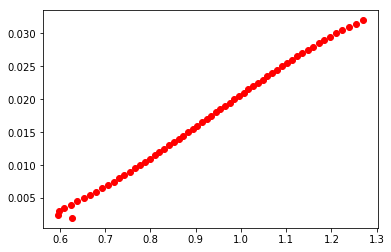

In [11]:
plt.plot(peak_amps[4,:],peak_amps[0,:],'ro')
from scipy.interpolate import interp1d
f = interp1d(peak_amps[4,:],peak_amps[0,:])
print('Estimated value of Omega_b H^2 = ' , f(real_sp_ratio))
print('Estimated value of Omega_c H^2 = ', 0.132-f(real_sp_ratio))
print(f(real_sp_ratio) - f(p_rat_ext_2))
print((0.132-f(real_sp_ratio)) - f(p_rat_ext_2))
plt.show()